# Laboratorium 11 - MOwNiT2

<br> https://github.com/piotrMocz/mownit2/blob/master/Chaos.ipynb

## Teoria chaosu

In [6]:
import math
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.integrate import odeint
from pylab import figure, show, setp
from mpl_toolkits.mplot3d import Axes3D

## Zadanie

Napisz program, który będzie rysował trajektorię dla któregoś z chaotycznych atraktorów: Lorenza, Roeslera, Kuramoto-Shivashinsky'ego (lub innych znalezionych). Rozwiązanie wymaga rozwiązania równania różniczkowego. W Pythonie można to zrobić np. funkcją [`odeint` z pakietu SciPy](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.integrate.odeint.html#scipy.integrate.odeint).

#### Lorenz Attractor

<Figure size 432x288 with 0 Axes>

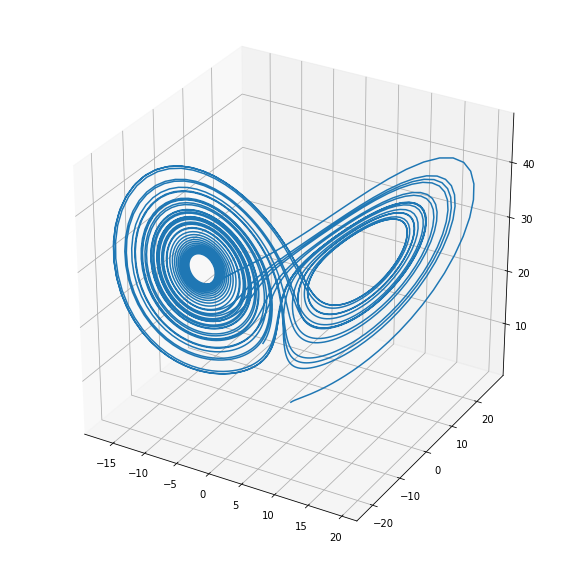

In [2]:
rho = 28.0
sigma = 10.0
beta = 8.0 / 3.0

def f(state, t):
  x, y, z = state  # unpack the state vector
  return sigma * (y - x), x * (rho - z) - y, x * y - beta * z  # derivatives

state0 = [1.0, 1.0, 1.0]
t = np.arange(0.0, 40.0, 0.01)

states = odeint(f, state0, t)

fig = plt.figure()
fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')
ax.plot(states[:,0], states[:,1], states[:,2])
plt.show()

#### Clifford Attractors

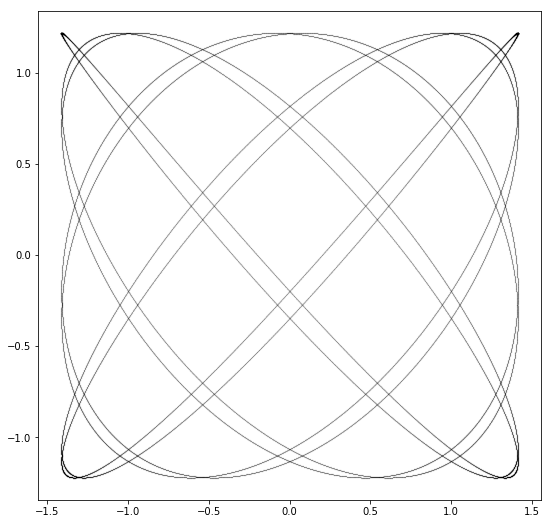

In [3]:
t = np.arange(0.0, 1000.0, 0.01)
steps = 100000

def clifford_attractor(x, y, a=-1.4, b=1.6, c=1.0, d=0.7):
    x_n1 = np.sin(a*y) + c*np.cos(a*x)
    y_n1 = np.sin(b*x) + d*np.cos(b*y)

    return x_n1, y_n1

# initialize solutions arrays (+1 for initial conditions)
xx = np.empty((steps + 1))
yy = np.empty((steps + 1))

# fill in initial conditions
xx[0], yy[0] = (0.1, -0.1)

# solve equation system
for i in range(steps):
    # Calculate derivatives	
    x_dot, y_dot = clifford_attractor(t[i], t[i])
    xx[i + 1] = x_dot
    yy[i + 1] = y_dot

plt.figure(figsize=(9,9))
plt.plot(xx, yy,'.',color='black',alpha=0.2,markersize=0.2)

plt.show()

#### Rössler attractor

NameError: name 'linspace' is not defined

In [ ]:
def num_rossler(x_n,y_n,z_n,h,a,b,c):
    x_n1=x_n+h*(-y_n-z_n)
    y_n1=y_n+h*(x_n+a*y_n)
    z_n1=z_n+h*(b+z_n*(x_n-c))   
    return x_n1,y_n1,z_n1

#Now we prepare some variables
#First the parameters
a=0.13
b=0.2
c=6.5

#Them the time interval and the step size
t_ini=0
t_fin=32*math.pi
h=0.0001
numsteps=int((t_fin-t_ini)/h)

#using this parameters we build the time.
t=linspace(t_ini,t_fin,numsteps)
#And the vectors for the solutions
x=zeros(numsteps)
y=zeros(numsteps)
z=zeros(numsteps)

#We set the initial conditions
x[0]=0
y[0]=0
z[0]=0

#This is the main loop where we use the recursive system to obtain the solution
for k in range(x.size-1):
    #We use the previous point to generate the new point using the recursion
    [x[k+1],y[k+1],z[k+1]]=num_rossler(x[k],y[k],z[k],t[k+1]-t[k],a,b,c)

fig = figure()
ax = fig.add_axes([0.55, 0.25, 0.35, 0.5],projection='3d')
ax.plot(x, y,z,color='black',lw=1,label='Evolution(t)')
ax.set_xlabel('x(t)')
ax.set_ylabel('y(t)')
ax.set_zlabel('z(t)')
ax.set_title('Evolution')
show()